## Week 4 - Exercise 1

Author: Khushee Kapoor

Last Updated: 19/4/22

### Setting Up

To start, we have imported the following libraries:

- NumPy: to work with the data
- Pandas: to manipulate the dataframe
- MatPlotLib: for data visualization
- Seaborn: for data visulization

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Next, we read the dataset and store it into a dataframe using the read_csv() function from the Pandas library.

In [2]:
# reading the dataset
df = pd.read_csv('German Credit Data.csv')

After that, we view the first few rows of the dataframe to get a glimpse of it. To do this, we use the head() function from the Pandas library.

In [3]:
# viewing the first 5 rows
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


### Q1. Use the German credit rating dataset “German Credit Data.csv”, Decision Tree Classifier to predict good or bad credit. Use “sklearn.model_selection” and GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:

**- Splitting criteria: gini or entropy.**

**- Maximum depth of decision tree ranging from 2 to 10.**

**- The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.**

To solve Question 1, we first encode the categorical columns (in theory the decision tree classifier can handle categorical values, but in sklearn implementation, we must encode them). To do this, we identify the categorical columns by picking only those which have an 'object' data type, then use the get_dummies() function from the Pandas library to encode the categorical values, merge them into the dataframe using the merge() function and then drop the original column using the drop() function from the Pandas library.

In [4]:
# identifying the categorical columns
categorical_cols = [cname for cname in df.columns if df[cname].dtype == 'object']

# encoding the categorical columns
for column in categorical_cols:    
    catdf = pd.get_dummies(df[column], prefix=column)    
    df = pd.merge(left=df, right=catdf, left_index=True, right_index=True)    
    df = df.drop(columns=column)

Next we split the data into independent variables (x) and independent variable (y) and use the train_test_split() function from the sklearn library and divide the dataset into training and testing sets.

In [5]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['status'])
y = df['status']

# diving the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=105)

Next, we import the needed libraries, modules, and functions to solve the following questions.

In [6]:
# importing the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

After that, we create a dictionary of the parameters and a list of their values that we want to search within to optimize the model. 

In [7]:
# creating a dictionary and list of their values to optimize the model
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(2,11))
}

Following that, we configure a grid search model and fit the training data to analyze and test all the combinations of the parameters on a DecisionTreeClassifier model with fixed random state, and use the roc-auc scoring metric to evaluate each combination, with 10 cross validations.

In [8]:
# intiating a grid search to find the most optimum parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=105), params, scoring='roc_auc', cv=10)

# fitting the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=105),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

Next, we use the best_estimator_ attribute of the grid search model to obtain the best parameters for the DecisionTreeClassifier.

In [9]:
# obtaining the best combination of parameters
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=105)

As we can see, the best combination of parameters is:

- criterion for split: entropy
- max_depth: 4

Now we use the above mentioned best combination to build a DecisionTreeClassifier model and fit the training set on it. We then check for the model's accuracy using the score() function.

In [10]:
# building a model with the best combination of parameters
model = grid_search.best_estimator_

# fitting the training data
model.fit(x_train, y_train)

# obtaining the accuracy
print(str.format('Accuracy: {:.2f}%', model.score(x_test, y_test)*100))

Accuracy: 72.40%


As we can see, the model gives us an accuracy of 72.40%, which is moderate.

### Q2. Visualize the tree using graphviz software.


To solve Question 2, we first create a list of features using the columns attribute of a Pandas dataframe, and a list of class names of the status column - which are 1 and 0. Then we use the export_graphviz() function to visualize the tree.

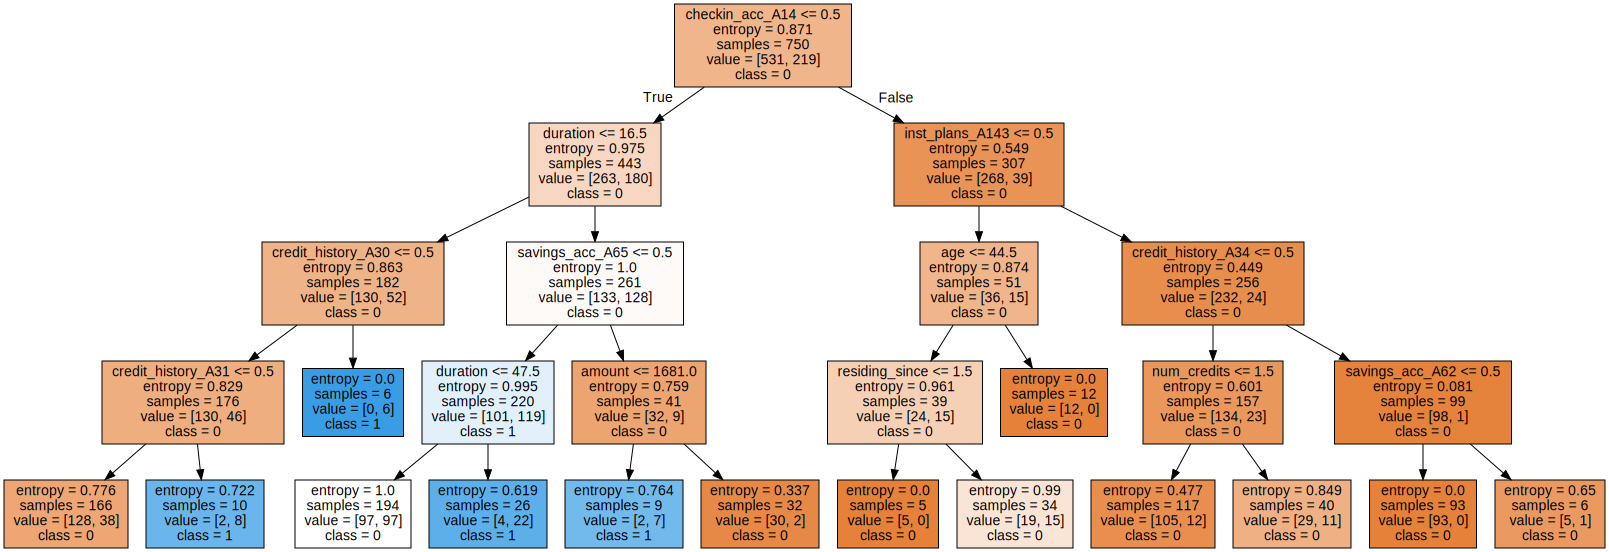

In [11]:
# creating a list of feature names
fn = list(df.drop(columns=['status']).columns)

# creating a list of class names
cn = ['0', '1']

# visualizing the tree
dot_data = tree.export_graphviz(model, out_file=None, feature_names=fn, class_names=['0', '1'], filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

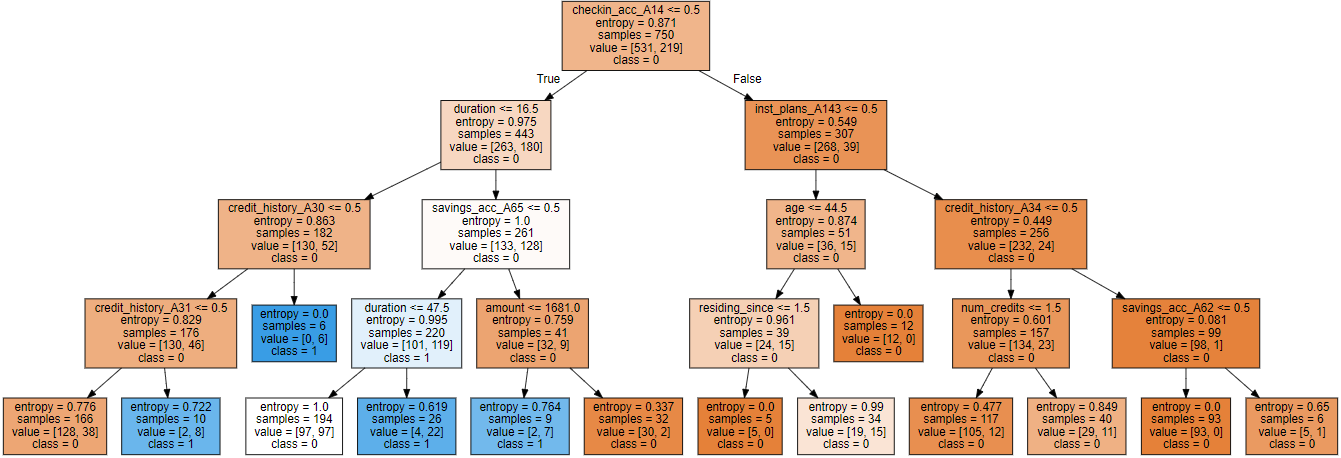

As we can see, in each node, we can see the following specifications:

- splitting condition (except leaves)
- entropy: the splitting criteria
- samples: total number of samples that are in that node
- values: [number of samples with status = 0, number of samples with status = 1]
- class: the class determined by that node by checking majority of values

### Q3. Display the text representation of the rules learnt.

To solve Question 3, we use the export_tree() function from the sklearn library to obtain the text representation of the tree.

In [12]:
# obtaining the text representation of the tree
text = tree.export_text(model, feature_names=fn)
print(text)

|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 16.50
|   |   |--- credit_history_A30 <= 0.50
|   |   |   |--- credit_history_A31 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- credit_history_A31 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- credit_history_A30 >  0.50
|   |   |   |--- class: 1
|   |--- duration >  16.50
|   |   |--- savings_acc_A65 <= 0.50
|   |   |   |--- duration <= 47.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  47.50
|   |   |   |   |--- class: 1
|   |   |--- savings_acc_A65 >  0.50
|   |   |   |--- amount <= 1681.00
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  1681.00
|   |   |   |   |--- class: 0
|--- checkin_acc_A14 >  0.50
|   |--- inst_plans_A143 <= 0.50
|   |   |--- age <= 44.50
|   |   |   |--- residing_since <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- residing_since >  1.50
|   |   |   |   |--- class: 0
|   |   |--- age >  44.50
|   |   |   |--- class: 0
|   |--- inst_plans_A143 >  0.50
|   |   |--- cre

For each of the lines above, we can add an 'if' before the condition and a 'then' after the condition, to make it more english readable, except the class lines. 

Note: for categorical attributes - checkin_acc_A14, credit_history_A30, credit_history_A31, savings_acc_A65, inst_plans_A143, credit_history_A34, savings_acc_A62, >=0.5 signifies 1 or yes, and <0.5 signifies 0 or no.